Calculating the Hausdorff distances...
	diameter = 1.0E-02, distance = 8.29E-03
	diameter = 1.0E-03, distance = 1.09E-03
	diameter = 1.0E-04, distance = 1.12E-04
	diameter = 1.0E-05, distance = 1.12E-05
	diameter = 1.0E-06, distance = 1.12E-06
Done!


Slope:0.9725986307643733 intercept:-0.08925732473439485


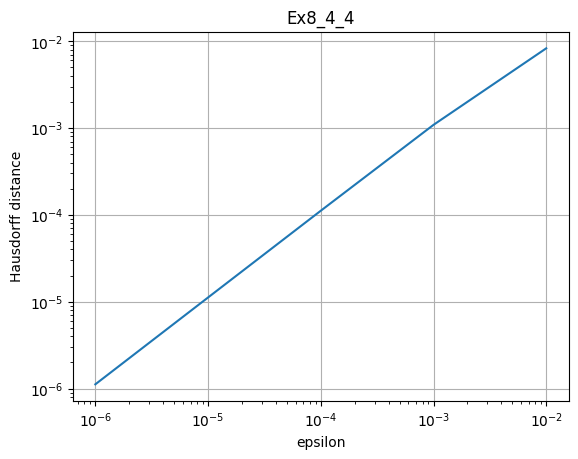

Ex8_4_4 executed


In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from pyomo.opt import SolverFactory, TerminationCondition
from src.analyses.value_function import ValueFunction
from src.analyses.convergence_analysis import HausdorffAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from scipy.optimize import curve_fit
def get_critical_width(alg,y_optimal,k=1,abs_epsilon=0.01):
    haus=HausdorffAnalyzer(alg)
    print(f"width: {abs_epsilon/k}")
    print(haus._gen_interval(y_optimal,abs_epsilon/k))
def linear_func(x, a, b):
        return a * x + b
def convergence_analysis(alg,fixed_pt,optimal_sol,start=-5,stop=0,steps=6,name="instance"):

    haus=HausdorffAnalyzer(alg)
    eps_list, distances=haus.analyze(y=fixed_pt, v=optimal_sol,
                    eps_min= start, eps_max = stop, steps= steps,
                    y_optimal= True)
    log_eps = np.log10(eps_list)
    log_distances = np.log10(distances)

    # Perform curve fitting
    params, _ = curve_fit(linear_func, log_eps, log_distances)
    print(f"Slope:{params[0]} intercept:{params[1]}")
    plt.loglog(eps_list, distances)
    plt.grid()
    plt.xticks(np.logspace(start, stop, steps))
    plt.xlabel("epsilon")
    plt.ylabel("Hausdorff distance")
    plt.title(name)
    plt.show()
from NSPLIB.src.instances.ex8_4_4.ex8_4_4_SP import const_model
ex844_obj= 0.33272388311799445
ex844_sol = {
    'x10': -0.23129676903369037, 'x11': 1.2249985914391361, 'x12': 0.05263738880099749, 'x13': 0.5614202118628403,
    'x14': 0.6217131656002401, 'x15': 1.1, 'x16': 0.806868640168786, 'x17': 0.663161467338442, 'x6': -1.1370129865018144,
    'x7': 1.5979758364259327, 'x8': -0.5986905053355759, 'x9': 1.372365581205024
}
ex844_y_bound = {
    'x10': [-1.2, 0.8], 'x11': [0.1, 2.1], 'x12': [-1.1, 0.9], 'x13': [0, 1],
    'x14': [0, 1], 'x15': [1.1, 1.3], 'x16': [0, 1], 'x17': [0, 1],
    'x6': [-2, 0], 'x7': [0.5, 2.5], 'x8': [-1.5, 0.5], 'x9': [0.2, 2.2]
}

sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()

alg=CaoZavalaAlgo(m,solver="baron")

convergence_analysis(alg,ex844_sol,ex844_obj,start=-6,stop=-2,steps=5,name="Ex8_4_4")
print("Ex8_4_4 executed")